##  衡量回归算法的标准，MSE vs MAE

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn import datasets

### 波士顿房产数据

换一种方式， 已经移除了， 

In [2]:
# boston = datasets.load_boston()

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]


In [5]:
data[:5]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00]])

In [4]:
print(target)

[24.  21.6 34.7 33.4 36.2 28.7 22.9 27.1 16.5 18.9 15.  18.9 21.7 20.4
 18.2 19.9 23.1 17.5 20.2 18.2 13.6 19.6 15.2 14.5 15.6 13.9 16.6 14.8
 18.4 21.  12.7 14.5 13.2 13.1 13.5 18.9 20.  21.  24.7 30.8 34.9 26.6
 25.3 24.7 21.2 19.3 20.  16.6 14.4 19.4 19.7 20.5 25.  23.4 18.9 35.4
 24.7 31.6 23.3 19.6 18.7 16.  22.2 25.  33.  23.5 19.4 22.  17.4 20.9
 24.2 21.7 22.8 23.4 24.1 21.4 20.  20.8 21.2 20.3 28.  23.9 24.8 22.9
 23.9 26.6 22.5 22.2 23.6 28.7 22.6 22.  22.9 25.  20.6 28.4 21.4 38.7
 43.8 33.2 27.5 26.5 18.6 19.3 20.1 19.5 19.5 20.4 19.8 19.4 21.7 22.8
 18.8 18.7 18.5 18.3 21.2 19.2 20.4 19.3 22.  20.3 20.5 17.3 18.8 21.4
 15.7 16.2 18.  14.3 19.2 19.6 23.  18.4 15.6 18.1 17.4 17.1 13.3 17.8
 14.  14.4 13.4 15.6 11.8 13.8 15.6 14.6 17.8 15.4 21.5 19.6 15.3 19.4
 17.  15.6 13.1 41.3 24.3 23.3 27.  50.  50.  50.  22.7 25.  50.  23.8
 23.8 22.3 17.4 19.1 23.1 23.6 22.6 29.4 23.2 24.6 29.9 37.2 39.8 36.2
 37.9 32.5 26.4 29.6 50.  32.  29.8 34.9 37.  30.5 36.4 31.1 29.1 50.
 33.3 3

In [6]:
len(data)

506

In [7]:
x=data[:,5]
# 只是用第５列
y=target

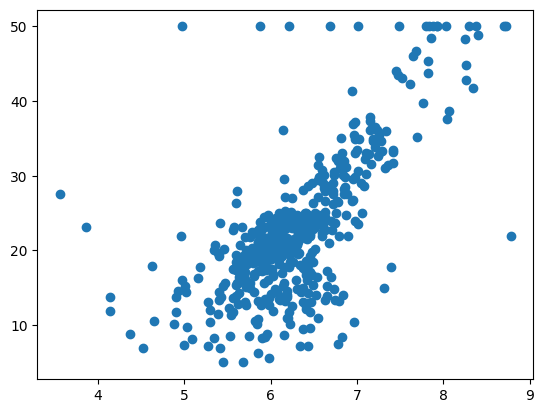

In [8]:
plt.scatter(x, y)
plt.show()

In [9]:
np.max(y)

np.float64(50.0)

In [10]:
# 去掉最高点，可能是异常数据
x = x[y < 50.0]
y = y[y < 50.0]

In [11]:
x.shape

(490,)

In [12]:
y.shape

(490,)

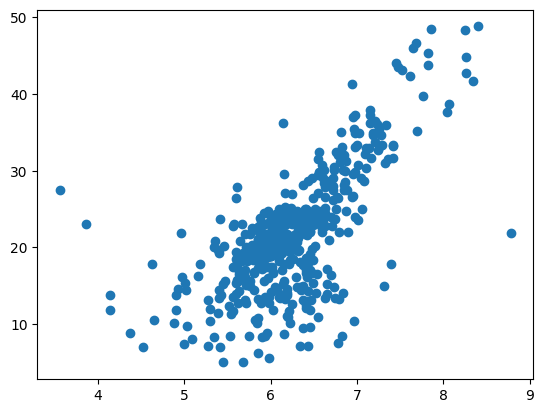

In [13]:
plt.scatter(x, y)
plt.show()

### 使用简单线性回归法

In [14]:
from playML.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, seed=666)

In [15]:
x_train.shape

(392,)

In [16]:
y_train.shape

(392,)

In [17]:
x_test.shape

(98,)

In [18]:
y_test.shape

(98,)

In [19]:
from playML.SimpleLinearRegression import SimpleLinearRegression

In [20]:
reg = SimpleLinearRegression()
reg.fit(x_train, y_train)

SimpleLinearRegression()

In [21]:
reg.a_

np.float64(7.8608543562689555)

In [22]:
reg.b_

np.float64(-27.459342806705543)

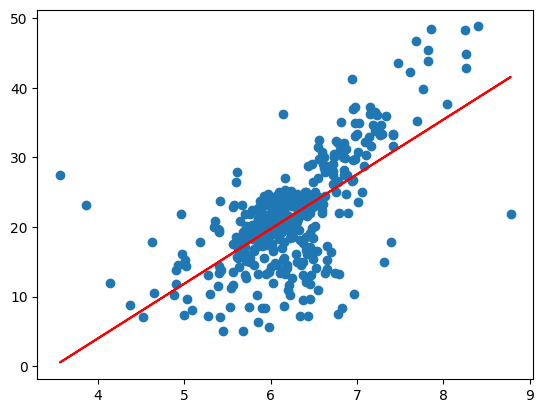

In [23]:
plt.scatter(x_train, y_train)
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

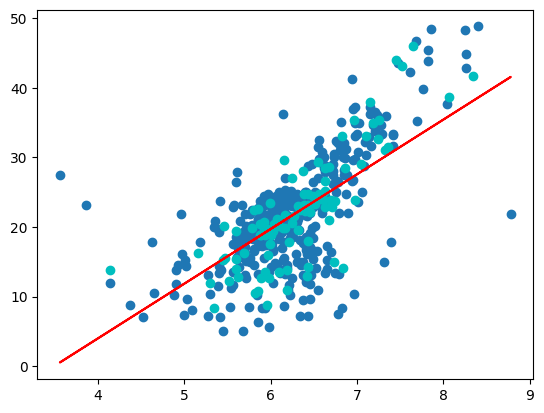

In [24]:
plt.scatter(x_train, y_train)
plt.scatter(x_test, y_test, color="c")
plt.plot(x_train, reg.predict(x_train), color='r')
plt.show()

In [26]:
y_predict = reg.predict(x_test)
y_predict

array([23.09381156, 23.14883754, 19.20268865, 29.02089574, 25.6014241 ,
        5.06887252, 24.66598243, 26.47397893, 15.52380881, 28.38416654,
       17.29250104, 13.0633614 , 23.99780981, 21.37228445, 23.29033292,
       21.66313607, 21.22292822, 19.94946982, 22.41777808, 25.17693796,
       19.51712283, 24.14716604, 24.57165218, 19.07691498, 23.14097668,
       28.78507011, 20.46042535, 18.18863844, 15.93257324, 29.46110359,
       31.65428195, 19.36776659, 16.77368466, 38.07659996, 19.72936589,
       20.99496345, 18.27510784, 24.22577459, 21.67099692, 22.7086297 ,
       21.22292822, 19.17910609, 15.41375685, 19.41493172, 16.5771633 ,
       23.13311583, 23.71481905, 30.13713706, 17.99211708, 24.69742585,
       19.43065343, 25.4284853 , 22.71649055, 16.53785903, 19.13194096,
       18.82536764, 22.15836989, 18.55809859, 25.03544258, 29.52399042,
       18.75461995, 19.69006162, 18.59740287, 14.58836714, 18.81750679,
       24.65812158, 20.83774636, 19.77653102, 27.88893272, 19.32

### MSE

平均方差 

In [27]:
mse_test = np.sum((y_predict - y_test)**2) / len(y_test)
mse_test

np.float64(24.156602134387438)

### RMSE

In [28]:
from math import sqrt

rmse_test = sqrt(mse_test)
rmse_test

4.914936635846635

### MAE

In [29]:
mae_test = np.sum(np.absolute(y_predict - y_test))/len(y_test)
mae_test

np.float64(3.5430974409463873)

### 封装我们自己的评测函数

代码参见 [这里](playML/metrics.py)

In [30]:
from playML.metrics import mean_squared_error
from playML.metrics import root_mean_squared_error
from playML.metrics import mean_absolute_error

In [31]:
mean_squared_error(y_test, y_predict)

np.float64(24.156602134387438)

In [32]:
root_mean_squared_error(y_test, y_predict)

4.914936635846635

In [33]:
mean_absolute_error(y_test, y_predict)

np.float64(3.5430974409463873)

### scikit-learn中的MSE和MAE

In [34]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [35]:
mean_squared_error(y_test, y_predict)

np.float64(24.156602134387438)

In [36]:
mean_absolute_error(y_test, y_predict)

np.float64(3.5430974409463873)

### MSE v.s. MAE